In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")


In [3]:
X,y = load_boston(return_X_y=True)

In [4]:
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X,columns= columns)

- when conducting an EDA, this needs to be done for all interesting variables of a data set individually. An easy way to visually summarize the distribution of a variable is the box plot.
-  Univariate outliers are extreme values in the distribution of a specific variable, whereas multivariate outliers are a combination of values in an observation that is unlikely.
- Only statistical method here.
-  An easy way to visually summarize the distribution of a variable is the box plot.
- Boxplot : It usually shows a rectangular box representing 25%-75% of a sample’s observations, extended by so-called whiskers that reach the minimum and maximum data entry. Observations shown outside of the whiskers are outliers

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


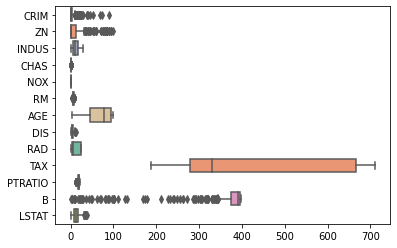

In [6]:
df1 = df[['TAX','B']]
df2 = df[['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','PTRATIO','LSTAT']]
df3 = df[['CHAS','NOX']]

axe = sns.boxplot(data = df,orient='h',palette='Set2')
# we see only AGE,TAX,RAD has no univariate outlier observations.All other outlier observations have outliers.

Text(0.5, 0, 'Crime rate per capita')

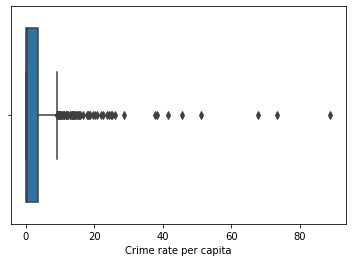

In [7]:
ax = sns.boxplot(x=df['CRIM'])
ax.set_xlabel("Crime rate per capita")

In [11]:
#Tukeys method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [12]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
print(probable_outliers_tm)
# 30 observation here

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]


In [13]:
print(possible_outliers_tm)
# 66 observation here

[367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


- The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. Also, the statistics are easy to calculate.
- Furthermore, this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings. If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

[]
[380, 404, 405, 410, 414, 418]


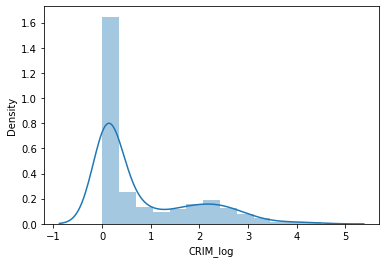

In [15]:
# used a log(x+1) transformation to avoid log(0) which is not defined and can cause errors. Read more about different options

#Transform 'CRIM' to log 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

### Z-score method
- Following a common rule of thumb, if z > C, where C is usually set to 3, the observation is marked as an outlier. This rule stems from the fact that if a variable is normally distributed, 99.7% of all data points are located 3 standard deviations around the mean. 
- For each observation (Xn), it is measured how many standard deviations the data point is away from its mean (X̄).
- Zn = (Xn-X̄)/SDx

In [8]:
#z-score method
'''def z_score_method(df,variable_n):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_n:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier


outlier_z = z_score_method(df,'CRIM')
print(outlier_z)
'''
# [380, 398, 404, 405, 410, 414, 418, 427]

InvalidIndexError: (slice(None, None, None), 0)

### MAD method
- The median absolute deviation method (MAD) replaces the mean and standard deviation with more robust statistics, like the median and median absolute deviation. 
- Defined as median(|Xi - X̄|)
- The test statistic is calculated like the z-score using robust statistics. Also, to identify outlying observations, the same cut-off point of 3 is used. If the test statistic lies above 3, it is marked as an outlier. 
- Compared to the internally (z-score) and externally studentized residuals, this method is more robust to outliers and does assume X to be parametrically distributed (Examples of discrete and continuous parametric distributions).


In [10]:
#MAD method 
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(df, 'CRIM')
print(outlier_mad)

[20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]


#### Some points related to all 3 methods:
- The **z-score** needs to be applied critically due to its sensitivity to mean and standard deviation and its assumption of a normally distributed variable. The **MAD** method *[Mean absolute deviation]*  is often used instead and serves as a more robust alternative. **Tukey’s box plot** method offers robust results and can be easily extended when the data is highly skewed.